In [13]:
#Imports
import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from tensorly.decomposition import tucker

/var/folders/mz/ywg60v213710yk8053f7h4k00000gn/T/ipykernel_24784/1527350380.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = face()


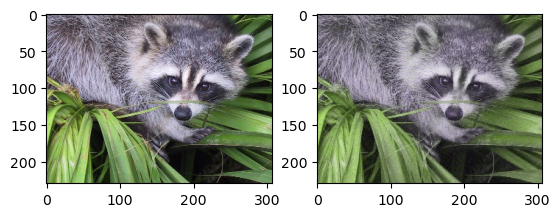

In [25]:
#Input: Load the image
image = face()
shrinkedImage = zoom(image, (0.3, 0.3, 1))
imageTensor = tl.tensor(shrinkedImage, dtype = 'float')


#Processing: 

#a. Performing tucker decomposition
tuckerRank = [100, 100, 2]
coreTensor, tuckerFactors = tucker(imageTensor, rank=tuckerRank, init='random', tol=10e-5, random_state=12345)
tuckerImage = tl.tucker_to_tensor((coreTensor, tuckerFactors))


def tensorToImage(tensor):
    npImage = tl.to_numpy(tensor)
    npImage -= npImage.min()
    npImage /= npImage.max()
    npImage *= 255
    return npImage.astype(np.uint8)

#Output: Show the image

#Displaying the original image
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(tensorToImage(imageTensor))

ax = fig.add_subplot(1, 2, 2)
ax.imshow(tensorToImage(tuckerImage))

plt.show()

